In [4]:
import numpy as np

import sys
import os
current_dir = os.getcwd()
sys.path.append(os.path.dirname(os.path.abspath(current_dir)))
from Backend.fake_backend import FakeBackend
from Backend.backend import Backend
from Result.result import ResultData

from qiskit_aer import Aer

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile

from qiskit.visualization import plot_histogram
from qiskit import transpile

from itertools import permutations
from SaveData.save_data_to_file import CSVWriter

from shor_algo_adder_method import *


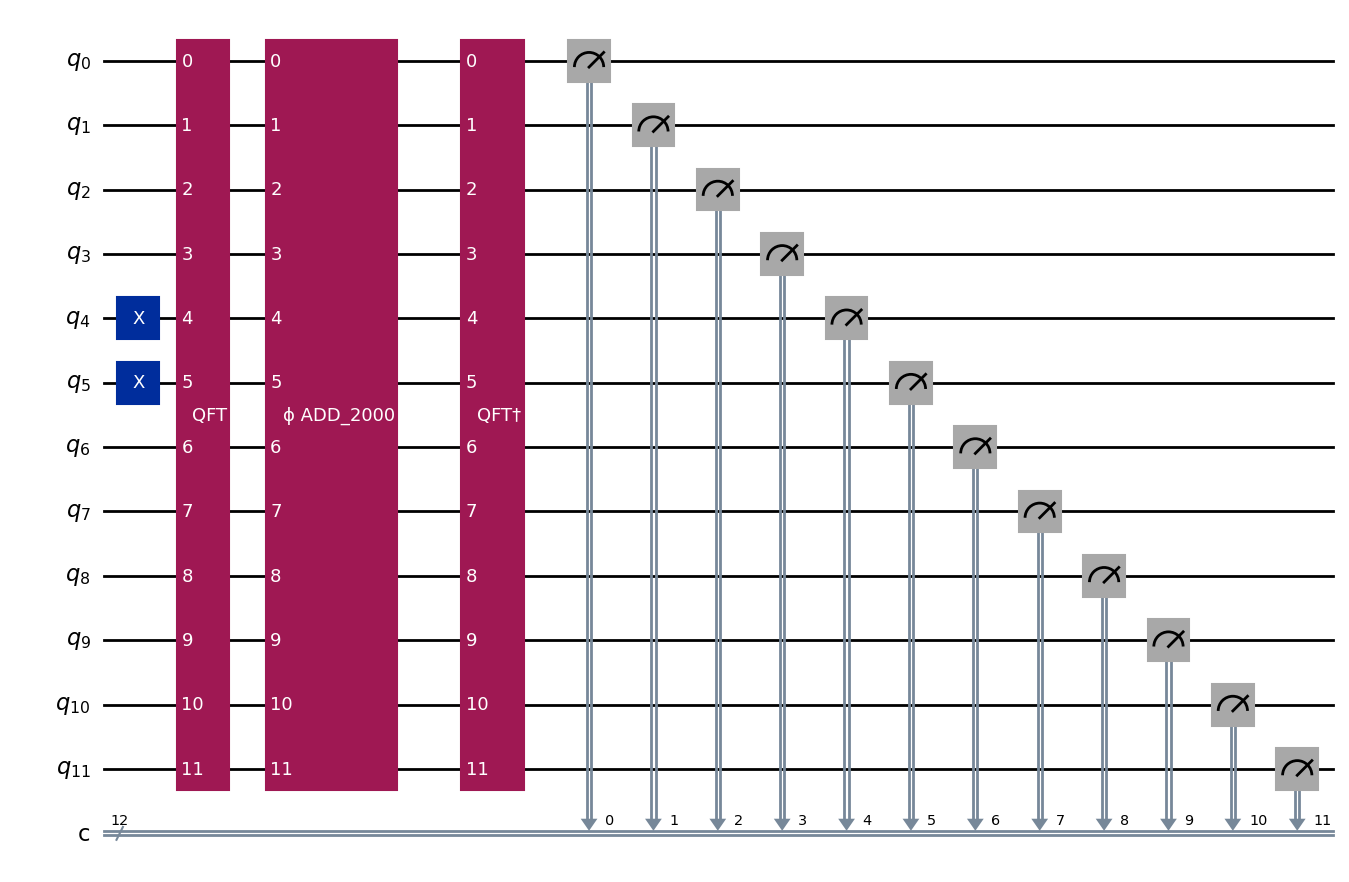

In [5]:
b = 48
a = 2000
n = 12

q = QuantumRegister(n, 'q')
c = ClassicalRegister(n, 'c')
classic_a = QuantumCircuit(q, c)

set_start_state(classic_a, b, 0)

classic_a.append(qft(n, False), range(n))
classic_a = classic_a.compose(adder_classic_a(n, a, kind="fixed"), range(n))
classic_a.append(qft_dagger(n, False), range(n))

classic_a.measure(range(n), range(n))

classic_a.draw('mpl')

KeyboardInterrupt: 

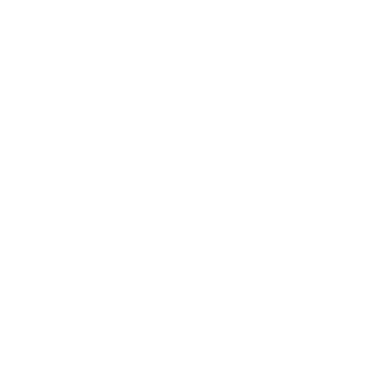

In [3]:
#for this circuit fake_torino is the best backend
n = 4
N = 11

a = 7
b = 9

a_mod_n_qc = QuantumCircuit(n+4, n+2)

a_mod_n_qc.x(0)
a_mod_n_qc.x(1)

set_start_state(a_mod_n_qc, b, 2)

a_mod_n_qc.append(qft(n+1, False), range(2, n+3))
a_mod_n_qc = a_mod_n_qc.compose(add_mod_n(a, N), range(n+4))
a_mod_n_qc.append(qft_dagger(n+1, False), range(2, n+3))


a_mod_n_qc.measure(range(2, n+3), range(n+1))
a_mod_n_qc.draw('mpl', fold=-1)

classic_a = a_mod_n_qc
classic_a.draw("mpl", fold=-1)

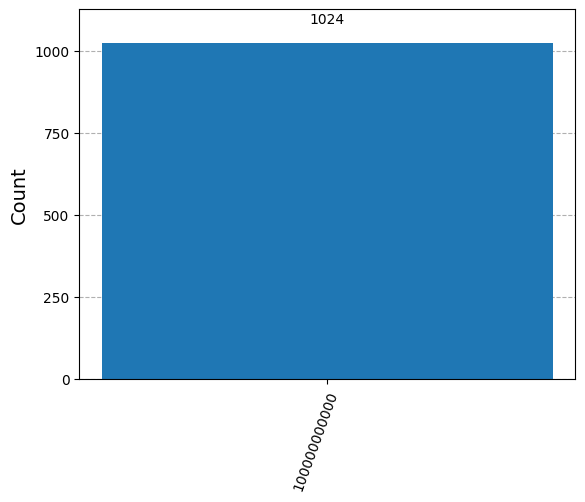

In [6]:
aer_sim = Aer.get_backend('aer_simulator')
t_subtract = transpile(classic_a, aer_sim)

counts_subtract = aer_sim.run(t_subtract).result().get_counts()
plot_histogram(counts_subtract)

In [49]:
generic_backend = Backend(n+4)
backend_names = FakeBackend.get_ibm_fake_backend_names_with_limit(n+4)
backend_names

['fake_algiers',
 'fake_almaden',
 'fake_auckland',
 'fake_boeblingen',
 'fake_brisbane',
 'fake_brooklyn',
 'fake_cairo',
 'fake_cambridge',
 'fake_cusco',
 'fake_geneva',
 'fake_guadalupe',
 'fake_hanoi',
 'fake_johannesburg',
 'fake_kawasaki',
 'fake_kolkata',
 'fake_kyiv',
 'fake_kyoto',
 'fake_manhattan',
 'fake_melbourne',
 'fake_montreal',
 'fake_mumbai',
 'fake_osaka',
 'fake_paris',
 'fake_peekskill',
 'fake_poughkeepsie',
 'fake_prague',
 'fake_quebec',
 'fake_rochester',
 'fake_sherbrooke',
 'fake_singapore',
 'fake_sydney',
 'fake_torino',
 'fake_toronto',
 'fake_washington']

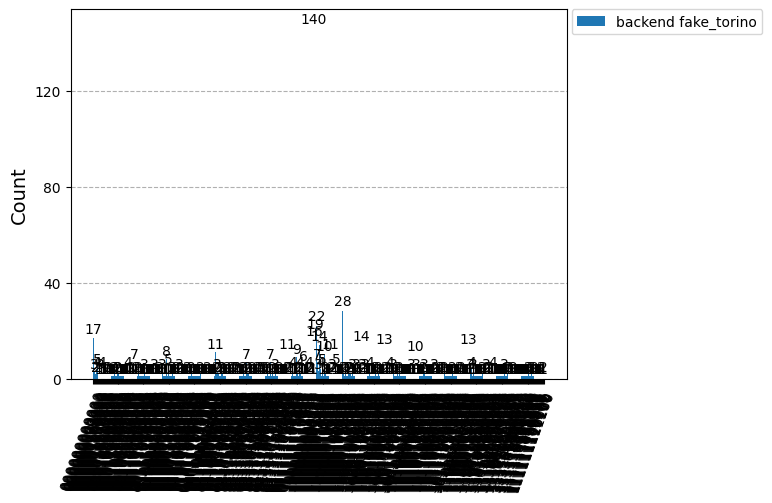

In [6]:
counts_lst = []
legens = []
backend_names =["fake_torino"]
for fake_backend_name in backend_names:
    fake_backend = FakeBackend(fake_backend_name)
    t_adder = transpile(classic_a, fake_backend.get_backend(), optimization_level=3)
    counts_subtract = fake_backend.run(t_adder, shots=1024, seed_simulator=None).result().get_counts()
    counts_lst.append(counts_subtract)
    legens.append(f"backend {fake_backend_name}")
plot_histogram(counts_lst, legend=legens)



In [9]:
print(counts_lst[0][bin(2048)[2:]])
print(len(counts_lst[0].keys()))

140
469


In [15]:
layoutlist = list(permutations(range(n//2), n//2))
# layoutlist = list(permutations(range(n+4), n+4))

lst = []
for l in layoutlist:
    l = list(l)
    l.extend(range(n//2+1, n+1))
    lst.append(l)

layoutlist = lst

print(layoutlist)
len(layoutlist)

[[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12], [0, 1, 2, 3, 5, 4, 7, 8, 9, 10, 11, 12], [0, 1, 2, 4, 3, 5, 7, 8, 9, 10, 11, 12], [0, 1, 2, 4, 5, 3, 7, 8, 9, 10, 11, 12], [0, 1, 2, 5, 3, 4, 7, 8, 9, 10, 11, 12], [0, 1, 2, 5, 4, 3, 7, 8, 9, 10, 11, 12], [0, 1, 3, 2, 4, 5, 7, 8, 9, 10, 11, 12], [0, 1, 3, 2, 5, 4, 7, 8, 9, 10, 11, 12], [0, 1, 3, 4, 2, 5, 7, 8, 9, 10, 11, 12], [0, 1, 3, 4, 5, 2, 7, 8, 9, 10, 11, 12], [0, 1, 3, 5, 2, 4, 7, 8, 9, 10, 11, 12], [0, 1, 3, 5, 4, 2, 7, 8, 9, 10, 11, 12], [0, 1, 4, 2, 3, 5, 7, 8, 9, 10, 11, 12], [0, 1, 4, 2, 5, 3, 7, 8, 9, 10, 11, 12], [0, 1, 4, 3, 2, 5, 7, 8, 9, 10, 11, 12], [0, 1, 4, 3, 5, 2, 7, 8, 9, 10, 11, 12], [0, 1, 4, 5, 2, 3, 7, 8, 9, 10, 11, 12], [0, 1, 4, 5, 3, 2, 7, 8, 9, 10, 11, 12], [0, 1, 5, 2, 3, 4, 7, 8, 9, 10, 11, 12], [0, 1, 5, 2, 4, 3, 7, 8, 9, 10, 11, 12], [0, 1, 5, 3, 2, 4, 7, 8, 9, 10, 11, 12], [0, 1, 5, 3, 4, 2, 7, 8, 9, 10, 11, 12], [0, 1, 5, 4, 2, 3, 7, 8, 9, 10, 11, 12], [0, 1, 5, 4, 3, 2, 7, 8, 9, 10, 11, 12], [0, 2, 1, 3, 4,

720

In [16]:
fake_backend = FakeBackend("fake_auckland")
transpile_list = []
for opt_lvl in [0, 3]: #[0, 3]:
    for layout in [None] + layoutlist:
        transpile_list.append(
            fake_backend.transpile_save_param(qc=classic_a, optimization_level=opt_lvl, initial_layout=layout, seed_transpiler=None, 
                                                 input_a = a, input_b = b, input_N = N, input_qubit_num = n))


ERROR:stevedore.extension:Could not load 'noise_adaptive': module 'qiskit.transpiler.preset_passmanagers.builtin_plugins' has no attribute 'NoiseAdaptiveLayoutPassManager'
ERROR:stevedore.extension:Could not load 'unroller': module 'qiskit.transpiler.preset_passmanagers.builtin_plugins' has no attribute 'UnrollerPassManager'
ERROR:stevedore.extension:Could not load 'noise_adaptive': module 'qiskit.transpiler.preset_passmanagers.builtin_plugins' has no attribute 'NoiseAdaptiveLayoutPassManager'
ERROR:stevedore.extension:Could not load 'unroller': module 'qiskit.transpiler.preset_passmanagers.builtin_plugins' has no attribute 'UnrollerPassManager'
ERROR:stevedore.extension:Could not load 'noise_adaptive': module 'qiskit.transpiler.preset_passmanagers.builtin_plugins' has no attribute 'NoiseAdaptiveLayoutPassManager'
ERROR:stevedore.extension:Could not load 'unroller': module 'qiskit.transpiler.preset_passmanagers.builtin_plugins' has no attribute 'UnrollerPassManager'
ERROR:stevedore.ext

In [17]:
qc_resultData = []
for qc_tr in transpile_list:
    qc_res  = qc_tr.backend.run(qc_tr.transpiled_qc, shots=1024, seed_simulator=None)
    result = ResultData(qc_res)  
    qc_resultData.append(result)

In [18]:
excel_name = f"add_mod_{N}_results_{a}_plus_{b}.csv"

save = CSVWriter(file_name=excel_name)

data = []
for qc_transpile, res_data in zip(transpile_list, qc_resultData):
    data.append([qc_transpile, res_data])  

save.save_data(data)

Data saved to ..\logs\add_mod_11_results_2000_plus_48_2024_08_20_18_18_10.csv


In [2]:
# counts = {'110001': 6, '101111': 24, '000110': 5, '100110': 8, '001111': 28, '111010': 7, '000010': 2, '101011': 13, '110101': 6, '011100': 25, '011111': 280, '110000': 2, '000111': 6, '000000': 2, '110111': 15, '100101': 12, '001110': 8, '111011': 21, '001011': 7, '100010': 6, '111110': 16, '000011': 7, '101100': 6, '101000': 5, '001010': 2, '100001': 16, '111111': 38, '011101': 70, '011011': 59, '100100': 5, '111100': 9, '001101': 7, '011110': 57, '111101': 18, '001100': 4, '100011': 26, '010110': 5, '100111': 17, '011000': 4, '010111': 29, '000100': 1, '110011': 3, '101101': 11, '000101': 7, '110010': 3, '101110': 14, '011010': 11, '110110': 1, '000001': 5, '101010': 9, '100000': 12, '011001': 12, '010000': 3, '010010': 8, '010101': 3, '010001': 6, '010011': 11, '001000': 2, '101001': 7, '111001': 7, '010100': 1, '001001': 3, '111000': 1}
counts = {'011100100000': 2, '111110100100': 1, '001000010000': 1, '001000001100': 1, '001111110000': 2, '010111010000': 1, '101100010000': 2, '100000000001': 10, '110000101000': 1, '010111000001': 1, '100100000100': 2, '100000111101': 1, '011000010000': 2, '100101010001': 1, '000011000000': 2, '100100000011': 1, '001110000001': 1, '011111000000': 6, '111000111000': 3, '001001111010': 1, '011010110110': 1, '001010000000': 1, '010101011000': 1, '111111100011': 1, '011101001010': 1, '101110010011': 1, '100010010000': 2, '010010111001': 1, '011000000001': 1, '101111110011': 1, '010011101000': 1, '010111101010': 1, '010001110010': 1, '100000101010': 3, '010110111000': 1, '011011100000': 3, '000000000001': 1, '011111011011': 1, '011011011100': 1, '000011100010': 1, '110111100000': 2, '001011000000': 1, '100011100100': 1, '010000011101': 1, '000010000001': 2, '100000010100': 2, '111111001000': 1, '011111111111': 1, '001010001010': 2, '111010110000': 1, '110000000000': 11, '110100000000': 2, '011101010000': 2, '110011110101': 1, '001001100000': 1, '110000010000': 1, '111111111101': 1, '001110100010': 1, '110100000010': 1, '111110001000': 1, '001001000000': 2, '100101001100': 1, '101110111111': 1, '001111000000': 1, '100100100001': 1, '000001000010': 2, '010111001000': 1, '110000100001': 3, '110011000010': 2, '000000000100': 4, '110111000011': 1, '101000011101': 1, '111100100010': 1, '001000100001': 1, '100110000000': 3, '111000000000': 4, '100000000101': 1, '010000110000': 3, '000011111001': 1, '011111110000': 7, '111100000000': 2, '111000110010': 2, '010110010000': 1, '100000100100': 1, '101011011100': 1, '101101001000': 2, '100010100000': 2, '101101001010': 1, '000000000011': 2, '011011100010': 1, '100011100000': 3, '011001000001': 1, '110111101000': 1, '011110000000': 3, '011011110010': 1, '100010110000': 3, '100000000011': 1, '011011110001': 1, '011110110000': 2, '010001110000': 2, '001101101010': 1, '100010000000': 6, '000111110001': 2, '100000100000': 8, '110101000000': 1, '000010000010': 2, '100000000000': 20, '110010111100': 1, '100001100000': 2, '101000000101': 2, '010110000101': 1, '011111011000': 2, '001000000100': 2, '110100101000': 1, '011111000001': 1, '001110000000': 1, '001000001000': 1, '110001000101': 1, '000000100010': 1, '011000000011': 1, '111110110001': 1, '100011111100': 3, '110010000110': 1, '100000110100': 1, '010110000000': 1, '011110100000': 4, '010001000000': 3, '011100101101': 1, '011010100000': 1, '001100100001': 1, '011101011000': 1, '111000101010': 1, '011001000000': 1, '010000100000': 1, '011111011110': 1, '001011000001': 1, '101100110001': 1, '111100001000': 1, '101110001100': 1, '100111000001': 1, '000010010000': 1, '101000000000': 9, '011110110001': 1, '011011110000': 1, '001000001001': 3, '101000001100': 2, '110111111000': 1, '011111001000': 1, '011100001110': 1, '100000011001': 1, '001011110010': 1, '000101101110': 1, '000001100010': 1, '010111100100': 2, '000110100001': 1, '010010111110': 1, '010100100000': 2, '110000100110': 1, '101111100100': 1, '100010101011': 1, '100001100011': 1, '111110010000': 2, '000000000000': 11, '000100000001': 1, '110001000000': 2, '011100000000': 1, '001100000100': 1, '101101010011': 1, '011100000001': 1, '010011001100': 1, '011000001000': 1, '110000000001': 1, '101000000100': 4, '100000000010': 9, '100111100000': 1, '100101000011': 1, '001110010010': 1, '101011101000': 1, '110000100011': 1, '000001000000': 3, '101001101100': 1, '010110011010': 1, '100010101000': 2, '110111000000': 1, '100000011011': 1, '111100100001': 1, '010000001010': 2, '110000010001': 1, '100011001101': 1, '110100000001': 2, '111100100101': 1, '101100100001': 1, '100111010100': 1, '011000011001': 1, '111100110000': 1, '110011110010': 1, '101010100010': 1, '110011111001': 1, '011101011010': 1, '100010000101': 1, '110010000001': 1, '111011011100': 1, '100000110011': 1, '000111100100': 1, '110101100000': 1, '111100101100': 1, '100000010000': 5, '011111100000': 4, '010000000000': 7, '111001110010': 1, '011101110100': 1, '110010000000': 3, '110000001110': 1, '111110000000': 3, '000000001000': 4, '100001000100': 3, '000111111100': 1, '100111110010': 1, '100110110000': 1, '101000001111': 1, '110000100010': 1, '011110001000': 1, '011111010000': 1, '010000010000': 1, '011000000010': 1, '010001101111': 1, '000000110010': 3, '011011100100': 1, '000000000101': 1, '100011100110': 1, '000101000000': 2, '111010001001': 1, '100101011100': 1, '110111000010': 1, '100001001100': 1, '111100010010': 1, '000110110000': 2, '110000110010': 1, '011110100100': 1, '011100010001': 1, '010000111101': 1, '110000100000': 1, '001110010001': 1, '000100000100': 2, '101101100010': 1, '100001000010': 2, '101001100101': 1, '011101111000': 1, '111111000110': 1, '000110000100': 1, '100101100001': 1, '100000101000': 1, '010010010101': 1, '010110001100': 1, '101010010100': 1, '000001111000': 2, '101100010010': 1, '101011110000': 1, '100111011000': 1, '111100001100': 1, '001010001011': 1, '010000111110': 1, '111111101010': 1, '010011010000': 1, '001111100000': 1, '100010001000': 3, '111101001011': 1, '101000111000': 1, '000101110100': 1, '111110000110': 1, '110000001100': 2, '011001010001': 1, '101011010001': 1, '011010111000': 1, '010100000001': 1, '101111001100': 1, '101111100001': 1, '111110110000': 1, '101010011101': 1, '001101110101': 1, '110110010000': 1, '000111101101': 1, '110111110000': 1, '011100100011': 1, '110111010000': 1, '011111000100': 1, '101000001011': 1, '110100010000': 1, '100000001100': 3, '111010000010': 1, '111101110000': 1, '101100111000': 1, '100010001010': 1, '101110011000': 1, '010010001000': 1, '001111110101': 1, '100001000000': 9, '110111000001': 1, '100000011100': 1, '111100100000': 1, '100001010100': 2, '101111101011': 1, '101111000000': 3, '010100010001': 1, '111000000010': 1, '101000101000': 1, '100001101010': 1, '111000100000': 1, '100100100100': 1, '100011111000': 1, '010101010100': 1, '111000011100': 1, '001111010010': 1, '110011001100': 1, '010100001000': 4, '000001100001': 1, '010001101100': 1, '101111010100': 2, '111000110111': 1, '011000110000': 3, '101110100010': 1, '100010100100': 1, '010110110000': 1, '000001010110': 2, '001111001010': 1, '100101000010': 1, '100100000000': 6, '011110000110': 1, '111111110000': 3, '010000000100': 2, '100011000001': 1, '011111100100': 1, '001010000100': 1, '100011110000': 3, '100001111010': 1, '100111100010': 1, '010010000000': 1, '100000111000': 1, '011100100010': 1, '010010100000': 2, '100110000010': 1, '011101000000': 2, '111000110000': 1, '001111100101': 1, '100110000100': 1, '011101000110': 1, '001000100101': 1, '101111000010': 2, '100001010110': 1, '010101101000': 1, '000001101100': 1, '101111001000': 2, '111110001001': 1, '100101100100': 1, '010110011001': 1, '000010110111': 1, '101101000001': 1, '000001011011': 1, '011111101000': 2, '010000001000': 1, '111111101000': 2, '011011100011': 1, '000000000010': 1, '100100011000': 2, '110111111100': 1, '101000001000': 1, '010011100110': 1, '010001000001': 1, '011110100001': 1, '100011101100': 1, '110110000100': 1, '001101010000': 1, '000110100000': 1, '010101110000': 1, '000010001000': 1, '000110000011': 1, '000000010000': 1, '011111101110': 2, '111111111010': 1, '101010000000': 3, '010111110000': 2, '101010101110': 1, '010000111011': 1, '111111101100': 1, '110000000101': 1, '100001011110': 1, '101010011100': 1, '110010000010': 2, '100000110000': 4, '011000011101': 1, '110001100010': 1, '001111110010': 1, '100010001100': 1, '100110011001': 1, '011000000000': 6, '111011100100': 1, '101000100000': 3, '101100000001': 1, '110000001000': 2, '000100100100': 1, '111010111000': 1, '010111100001': 1, '000001011110': 1, '100000001000': 6, '101000100111': 1, '100111010001': 1, '101100100100': 2, '010111111100': 1, '110001110010': 1, '010100010000': 2, '101111010000': 1, '011111000010': 1, '010001100010': 2, '000010101110': 1, '110110001000': 2, '100100100000': 2, '001111000001': 1, '000110111000': 1, '100001001000': 2, '100101000001': 2, '000110010100': 2, '101000100001': 1, '111111100000': 1, '101101100000': 1, '001110011000': 1, '011110000011': 1, '101011100010': 1, '010111000000': 1, '101000000011': 1, '110010010110': 1, '110011000000': 2, '001011010000': 2, '000001010000': 1, '100010100010': 1, '011110010000': 2, '011110101000': 1, '100111111100': 1, '010110101001': 1, '010110010001': 1, '010110000010': 1, '110010000100': 1, '000011001000': 1, '000010110001': 1, '100000001010': 2, '101101110010': 1, '110000001011': 1, '110000000011': 1, '010011100101': 1, '010110100000': 1, '100101100101': 1, '101101000000': 1, '110100000101': 2, '011001011000': 1, '100000100001': 1, '110111110010': 1, '101101100100': 1, '111000001000': 2, '000000001101': 1, '010000010111': 1, '100011011000': 1, '011000101001': 1, '110101000100': 1, '001011111000': 1, '011000000100': 1, '001110001010': 1, '011100101001': 1, '100011000000': 2, '010000001011': 1, '110000010010': 1, '100101110010': 1, '100010101001': 1, '111111011100': 1, '001101010001': 1, '101100000000': 2, '000100100101': 1, '010111100000': 2, '111101011011': 1, '011100000100': 2, '010100000010': 1, '110000000100': 2, '000100101000': 1, '111111000100': 1, '001100010011': 1, '000001110100': 1, '100001010000': 2, '011110000100': 2, '100100000010': 1, '100100111000': 1, '000111000000': 1, '110001100001': 1, '101010010010': 1, '110101111110': 1, '100110101111': 1, '001100001000': 1, '000010100010': 1, '000010111001': 1, '100000100011': 1, '011000001010': 1, '111011101110': 1, '110011011000': 1, '000010100110': 1, '110101110110': 1, '100100010000': 2, '001110100100': 1, '010111100010': 1, '111010100000': 1, '110000101100': 2, '110000110000': 3, '110100100000': 1, '010010001011': 1, '001100010000': 1, '011101101001': 1, '110001101000': 1, '010100100010': 1, '000011100100': 2, '000000011000': 2, '000001101001': 1, '010100000000': 2, '001110101010': 1, '101100110100': 1, '001001110000': 1, '010000101101': 1, '011111010001': 1, '111110100000': 1, '001100000000': 2, '000010010010': 1, '101101111001': 1, '100010000011': 1, '101001100000': 1, '011111100011': 1, '011100000010': 2, '101111111001': 1, '100001110000': 1, '101101010000': 1, '100100001000': 2, '000100000000': 1, '011010000100': 1, '111110100001': 1, '101001111000': 1, '111111000000': 1, '000010001001': 1, '001000000101': 1, '011100001010': 1, '110011010001': 1, '101111010010': 2, '000000110100': 1, '100001111111': 1, '010010000111': 1, '001000110000': 1, '111000011010': 1, '010110010010': 1, '100111010110': 1, '101111010011': 1, '110001010000': 1, '001111000100': 1, '111000100001': 1, '100100100101': 1, '001111111010': 1, '001000000010': 1, '010101010001': 1, '111101100110': 1, '111111000010': 1, '011101000001': 1, '100110000011': 1, '111101100010': 1, '101011001110': 1, '100011110001': 1, '011111111000': 2, '011111010100': 1, '010000101010': 1, '110110000011': 1, '100100100010': 1, '011010000000': 4, '101111011100': 1, '101000110000': 1, '011110110101': 1, '011011110100': 1, '011010100010': 1, '011000100000': 1, '001110110000': 1, '011101100000': 4, '100001001001': 1, '001100101011': 1, '100001100001': 1, '101011000011': 1, '100100100110': 2, '100100001110': 1, '011011000000': 2, '010010010010': 1, '000000001001': 1, '011011101000': 1, '100001000101': 1, '001100111000': 1, '011000000110': 2, '100011111001': 1, '010000001100': 1, '101010000110': 1, '001101100110': 2, '011111100010': 3, '100001000110': 1, '100110010101': 1, '010010101101': 1, '100111000100': 1, '010010110000': 2, '011000110110': 1, '101110100100': 1, '001011010011': 1, '101111101100': 1, '000111011000': 1, '101110110101': 1, '010011000000': 1, '010001111001': 1, '111001001001': 1, '100010100001': 1, '000001010011': 1, '011111110011': 1, '101001000000': 1, '111011000000': 1, '101000100011': 1, '011111111100': 3, '111110110010': 1, '111101000000': 1, '010001100100': 1, '111100011000': 1, '011011101101': 1, '011011001010': 1, '000000011100': 1, '100111011110': 1, '001011110000': 1, '010010101000': 1, '001101110001': 1, '011101001101': 1, '010010110010': 1, '100001111000': 2, '100000010010': 1, '110010001000': 1, '100111000000': 1, '101000000001': 1, '100110110010': 1, '000000101000': 1, '110100001101': 1, '010011000100': 1, '111101010000': 1, '000100010000': 1, '100100010010': 1, '010001001000': 1, '101010000010': 1, '111011101100': 1, '010001101010': 1, '111000101000': 1, '100001101110': 1, '111001010000': 1, '010111110010': 1, '111000111001': 1, '011010001001': 1, '010000000011': 1, '110110100010': 1, '100100110010': 1, '111101110001': 1, '010000000010': 2, '000100100011': 2, '100011001001': 1, '100100001100': 1, '011100110000': 1, '001100100000': 2, '101111111000': 1, '011100000011': 1, '111011111000': 1, '010100010010': 1, '000111110000': 1, '111001101000': 1, '000101101001': 1, '001000100000': 1, '011101110000': 1, '100100110011': 1, '100101010100': 1, '010010101010': 1, '011110111010': 1, '110011100000': 1, '000011000010': 1, '011000110001': 1, '011101100100': 1, '011000010001': 1, '001010001000': 1, '100011010000': 1, '110101000010': 1, '000010000000': 2, '100011100001': 1, '110110000000': 1, '010111000010': 1, '000111001001': 1, '000010110000': 1, '111111101001': 1, '100110100011': 1, '010101000000': 2, '000111110010': 1, '010111001100': 1, '101100000011': 1, '011101110101': 1, '000100010001': 1, '111100000100': 1, '100101011000': 1, '010101001000': 1, '100101000100': 1, '101001000010': 1, '011111101010': 1, '110001100000': 1, '001111101100': 1, '001111111001': 1, '101001110000': 1, '011111110010': 1, '011011001110': 1, '011101001001': 1, '010010000011': 1, '001110001000': 1, '100110000110': 1, '001110111001': 1, '000000111100': 1}


from Result.counts_plot_helpers import *

counts = norm_counts(counts)

# plot_histogram(counts)
m = max(counts.items(), key=lambda x: x[1])
print(m)
print(int(m[0], 2))

ModuleNotFoundError: No module named 'Result'